In [417]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
import math
import copy
warnings.filterwarnings('ignore')
%matplotlib inline

plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus']=False
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [444]:
rental=pd.read_csv('C:/Users/user/Desktop/서울시청/데이터/독립변수/최종 독립변수.csv',encoding='cp949')

In [445]:
rental.columns

Index(['대여소번호', 'subway', 'park', '상업지역', 'weighted_LEN_mean', 'mean_width',
       '주거', 'school', 'sports', 'adult', 'study', 'market', 'game', 'house',
       'culture', 'hell', 'parking', 'bike', 'bus_dis', 'bus_all', 'sub_all',
       '건축면적', '건폐율', '공시지가', '지하층수', '용적율', '높이', '연면적', '지상층수', '대지면적', '인구',
       'starbucks', 'PB'],
      dtype='object')

# 데이터 스케일링

## 지하철, 공원 최소거리 시각화

* 공원 최소 거리(m)
* 지하철 최소 거리(m)
* 루트 변환

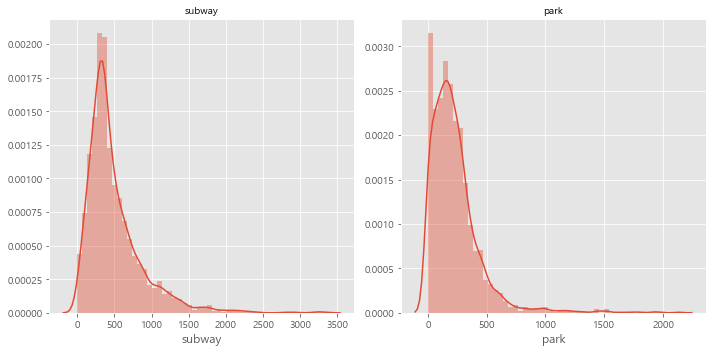

In [446]:
data_1=['subway','park']
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)

for i in range(2):
    sns.distplot(rental[data_1[i]],ax=axes[i])
    axes[i].set_title('{}'.format(data_1[i]),size=10)
plt.tight_layout()
plt.show()

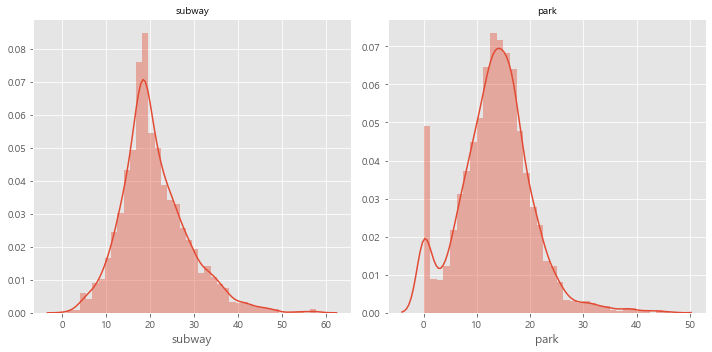

In [447]:
data_1=['subway','park']
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)

for i in range(2):
    sns.distplot(np.sqrt(rental[data_1[i]]),ax=axes[i])
    axes[i].set_title('{}'.format(data_1[i]),size=10)
plt.tight_layout()
plt.show()

* 루트 변환

In [448]:
for i in ['subway','park']:
    rental[i]=np.sqrt(rental[i])

In [449]:
rental.isna().sum()

대여소번호                 0
subway                0
park                  0
상업지역                  0
weighted_LEN_mean     0
mean_width           16
주거                    0
school                0
sports                0
adult                 0
study                 0
market                0
game                  0
house                 0
culture               0
hell                  0
parking               0
bike                  0
bus_dis               0
bus_all               0
sub_all               0
건축면적                  0
건폐율                   0
공시지가                  0
지하층수                  0
용적율                   0
높이                    0
연면적                   0
지상층수                  0
대지면적                  0
인구                    0
starbucks             0
PB                    0
dtype: int64

* 도로폭 결측치 평균 대체

In [450]:
rental.loc[rental['mean_width'].isna(),'mean_width']=rental['mean_width'].mean()

## 지역, 도로 변수 시각화
* 반경 100m 내의 상업지역
* 반경 100m 내의 주거지역
* 반경 100m 내의 평균 도로폭
* 반경 100m 내의 평균 경사도

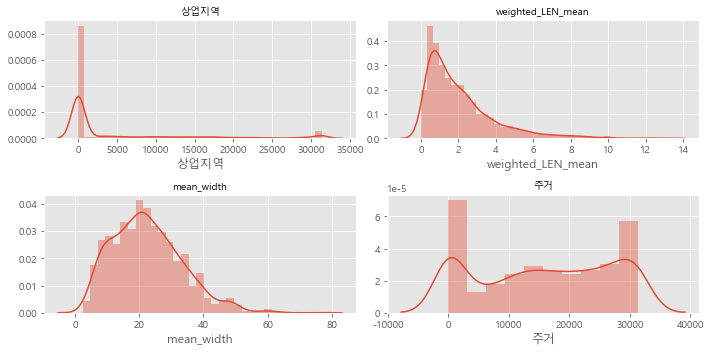

In [452]:
data_1=['상업지역', 'weighted_LEN_mean', 'mean_width','주거']
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,5)

for i in range(4):
    sns.distplot(rental[data_1[i]],ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title('{}'.format(data_1[i]),size=10)
plt.tight_layout()
plt.show()

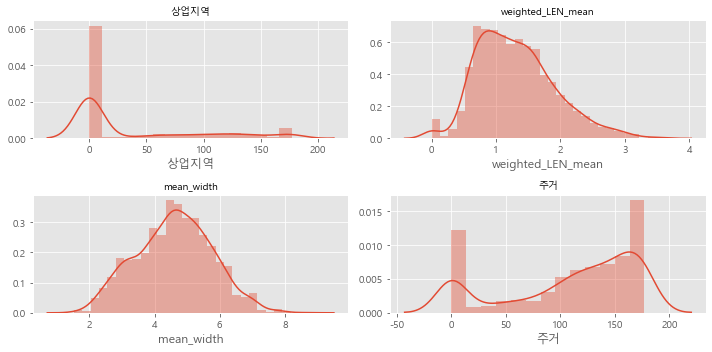

In [453]:
data_1=['상업지역', 'weighted_LEN_mean', 'mean_width','주거']
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,5)

for i in range(4):
    sns.distplot(np.sqrt(rental[data_1[i]]),ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title('{}'.format(data_1[i]),size=10)
plt.tight_layout()
plt.show()

* 도로폭, 경사도 루트변환

In [454]:
for i in ['weighted_LEN_mean', 'mean_width']:
    rental[i]=np.sqrt(rental[i])

* 상업지역 이진 변환

In [455]:
rental.loc[rental['상업지역']>0,'상업지역']=1
rental.loc[rental['상업지역']==0,'상업지역']=0

In [457]:
rental.head()

,대여소번호,subway,park,상업지역,weighted_LEN_mean,mean_width,주거,school,sports,adult,...,공시지가,지하층수,용적율,높이,연면적,지상층수,대지면적,인구,starbucks,PB
0,2301,26.682318,15.887469,0.0,0.919526,5.034661,14677.222656,87.435847,153.147202,106.104049,...,1.245851e+08,7.32,536.14,61.94,49065.67,45.83,1445.89,0.000000,4.0,1.0
1,2302,16.155344,17.821857,1.0,1.722379,6.328071,26691.501099,752.191921,268.035145,27.018746,...,1.789425e+08,13.48,2457.91,212.74,17192.30,50.36,4236.98,19.200000,7.0,2.0
2,2303,12.097848,12.064857,1.0,1.890088,6.296916,27516.596802,831.058272,179.164630,73.200264,...,1.625719e+08,16.70,2333.21,211.45,26948.84,55.05,5301.25,14.465517,5.0,2.0
3,2304,9.800345,18.018729,1.0,2.197407,5.904988,22835.113037,803.744535,280.317435,174.098002,...,9.064238e+07,16.13,2393.47,211.08,35039.55,54.41,7360.67,15.419355,5.0,5.0
4,2305,20.239080,17.467086,1.0,1.856700,6.049801,24900.542114,181.728030,302.311367,74.844749,...,1.672497e+08,14.75,2665.58,253.51,27188.62,57.53,6219.83,11.108108,4.0,2.0


### 시설 변수 시각화
* 로그변환
    * 유흥
    * 학업
    * 마켓
    * 게임
    * 숙박
    * 문화
* 루트변환
    * 학교
    * 스포츠
    * 연구실
    * 주차장
    * 자전거 편의시설

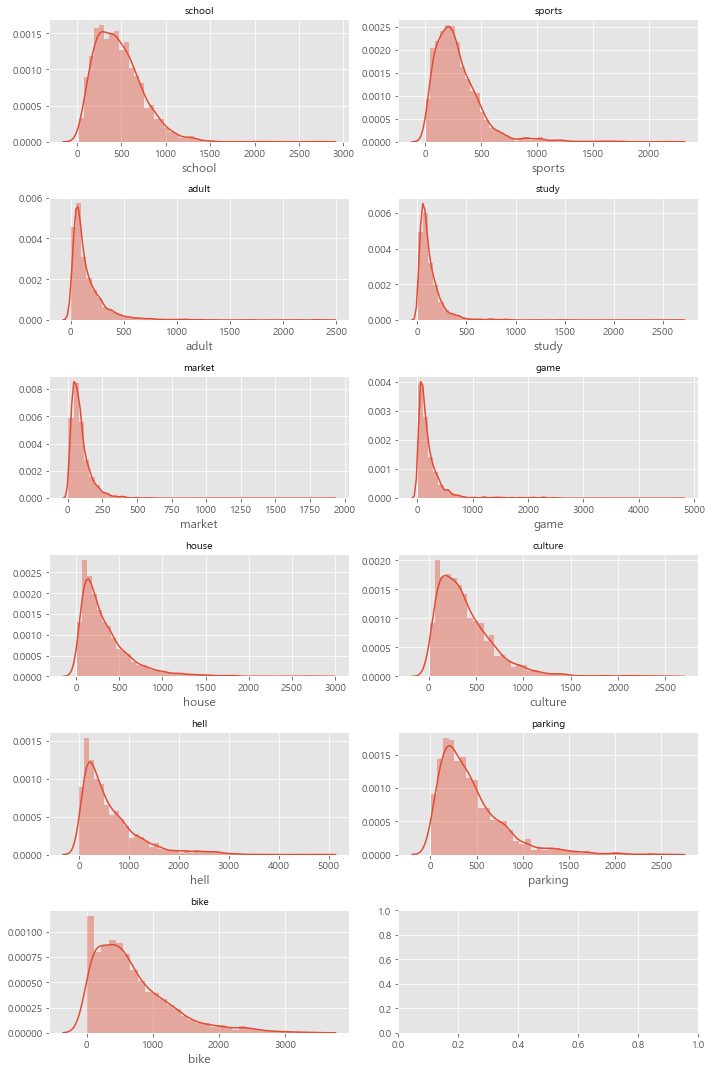

In [458]:
data_1=['school', 'sports', 'adult', 'study', 'market', 'game', 'house','culture', 'hell', 'parking', 'bike']
fig,axes=plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(10,15)

for i in range(11):
    sns.distplot(rental[data_1[i]],ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title('{}'.format(data_1[i]),size=10)
plt.tight_layout()
plt.show()

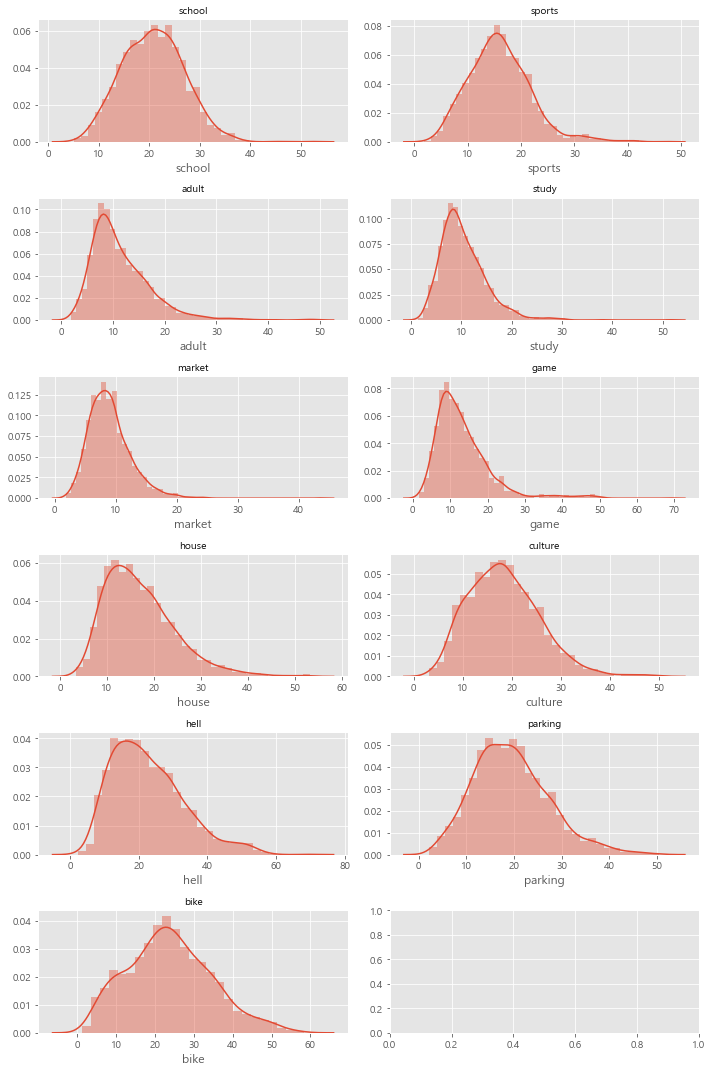

In [459]:
data_1=['school', 'sports', 'adult', 'study', 'market', 'game', 'house','culture', 'hell', 'parking', 'bike']
fig,axes=plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(10,15)

for i in range(11):
    sns.distplot(np.sqrt(rental[data_1[i]]),ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title('{}'.format(data_1[i]),size=10)
plt.tight_layout()
plt.show()

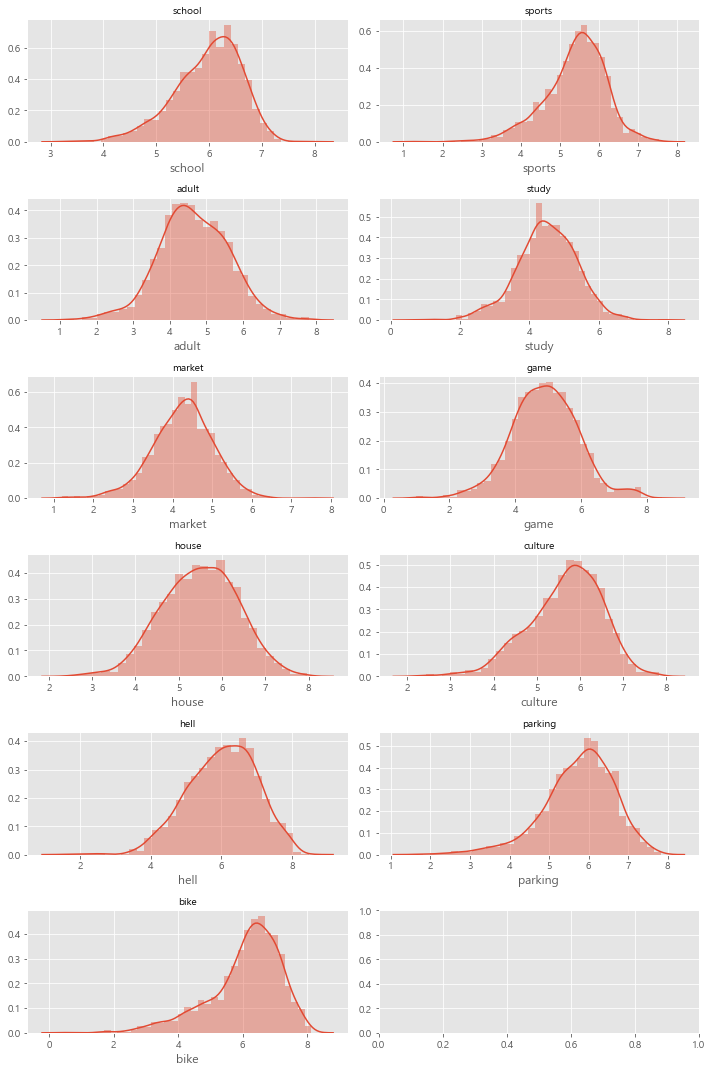

In [460]:
data_1=['school', 'sports', 'adult', 'study', 'market', 'game', 'house','culture', 'hell', 'parking', 'bike']
fig,axes=plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(10,15)

for i in range(11):
    sns.distplot(np.log(rental[data_1[i]]),ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title('{}'.format(data_1[i]),size=10)
plt.tight_layout()
plt.show()

* 루트 변환
    * 학교
    * 스포츠센터
    * 고시원
    * 주차장
    * 자전거 편의시설

* 로그 변환
    * 유흥시설
    * 학업
    * 마켓
    * 게임
    * 숙박
    * 문화

In [461]:
for i in ['school', 'sports', 'hell', 'parking', 'bike']:
    rental[i]=np.sqrt(rental[i])
    
for i in ['adult', 'study', 'market', 'game', 'house','culture']:
    rental[i]=np.log(rental[i])


### 대중교통 데이터 시각화
* 버스 승하차 루트변환
* 지하철 승하차, 버스 정류장 거리 로그 변환

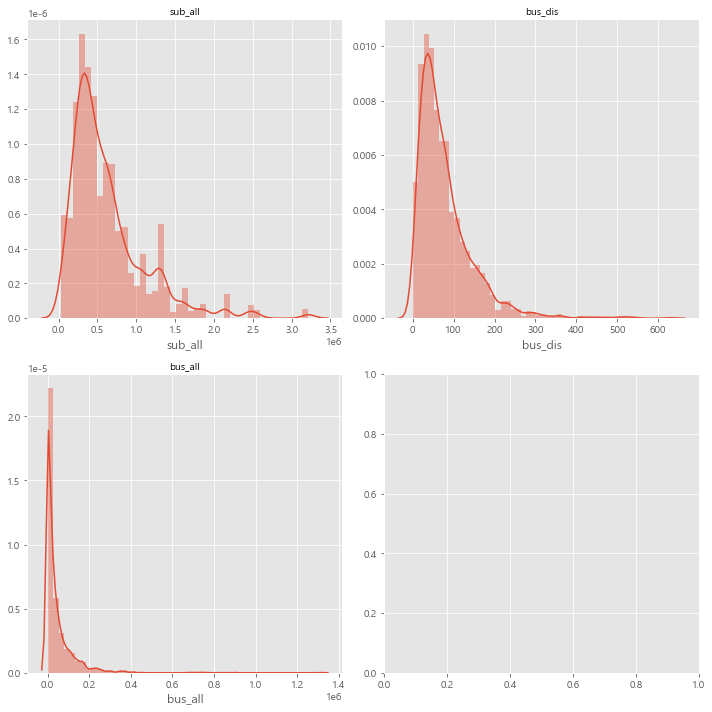

In [462]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)
a=['sub_all','bus_dis', 'bus_all']
    
for i in range(3):
    sns.distplot(rental[a[i]],ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title('{}'.format(a[i]),size=10)
plt.tight_layout()
plt.show()

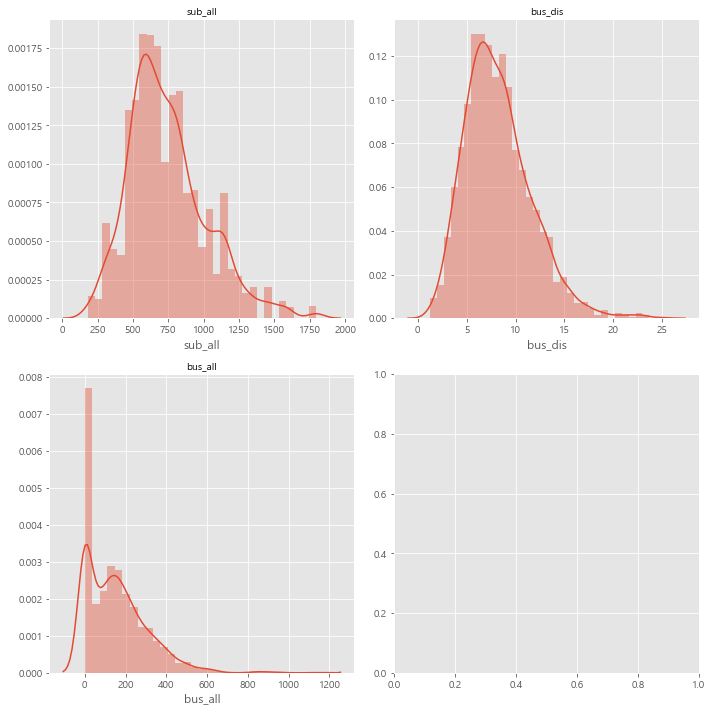

In [463]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,10)
a=['sub_all','bus_dis', 'bus_all']
    
for i in range(3):
    sns.distplot(np.sqrt(rental[a[i]]),ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title('{}'.format(a[i]),size=10)
plt.tight_layout()
plt.show()

* 지하철 승하차, 버스 정류장 루트 변환

In [464]:
for i in ['sub_all','bus_dis']:
    rental[i]=np.log(rental[i])
rental['bus_all']=np.sqrt(rental['bus_all'])

In [466]:
rental.head()

,대여소번호,subway,park,상업지역,weighted_LEN_mean,mean_width,주거,school,sports,adult,...,공시지가,지하층수,용적율,높이,연면적,지상층수,대지면적,인구,starbucks,PB
0,2301,26.682318,15.887469,0.0,0.919526,5.034661,14677.222656,9.350714,12.375266,4.664420,...,1.245851e+08,7.32,536.14,61.94,49065.67,45.83,1445.89,0.000000,4.0,1.0
1,2302,16.155344,17.821857,1.0,1.722379,6.328071,26691.501099,27.426118,16.371779,3.296531,...,1.789425e+08,13.48,2457.91,212.74,17192.30,50.36,4236.98,19.200000,7.0,2.0
2,2303,12.097848,12.064857,1.0,1.890088,6.296916,27516.596802,28.828081,13.385239,4.293199,...,1.625719e+08,16.70,2333.21,211.45,26948.84,55.05,5301.25,14.465517,5.0,2.0
3,2304,9.800345,18.018729,1.0,2.197407,5.904988,22835.113037,28.350389,16.742683,5.159618,...,9.064238e+07,16.13,2393.47,211.08,35039.55,54.41,7360.67,15.419355,5.0,5.0
4,2305,20.239080,17.467086,1.0,1.856700,6.049801,24900.542114,13.480654,17.387103,4.315416,...,1.672497e+08,14.75,2665.58,253.51,27188.62,57.53,6219.83,11.108108,4.0,2.0


## 건물 데이터 시각화

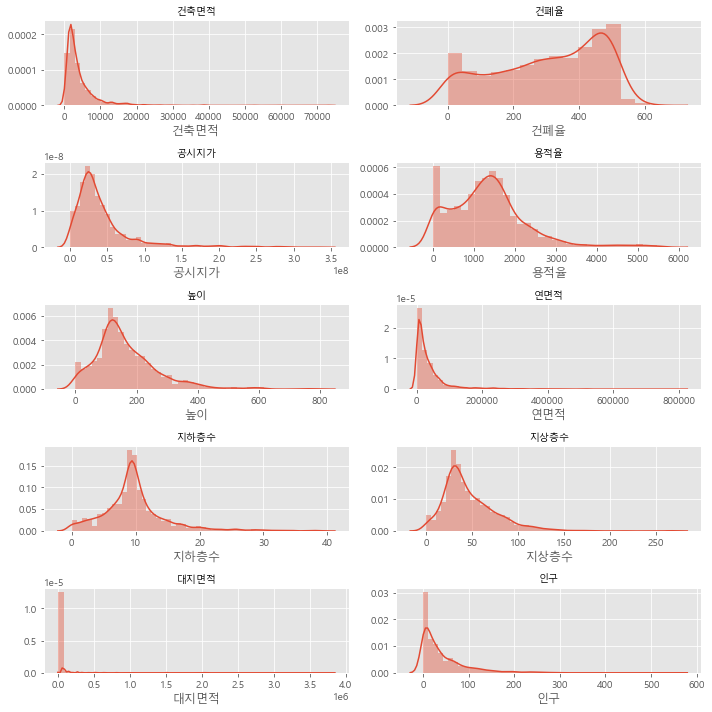

In [467]:
fig,axes=plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10,10)
a=['건축면적', '건폐율', '공시지가', '용적율', '높이', '연면적', '지하층수','지상층수', '대지면적', '인구']
    
for i in range(10):
    sns.distplot(rental[a[i]],ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title('{}'.format(a[i]),size=10)
plt.tight_layout()
plt.show()

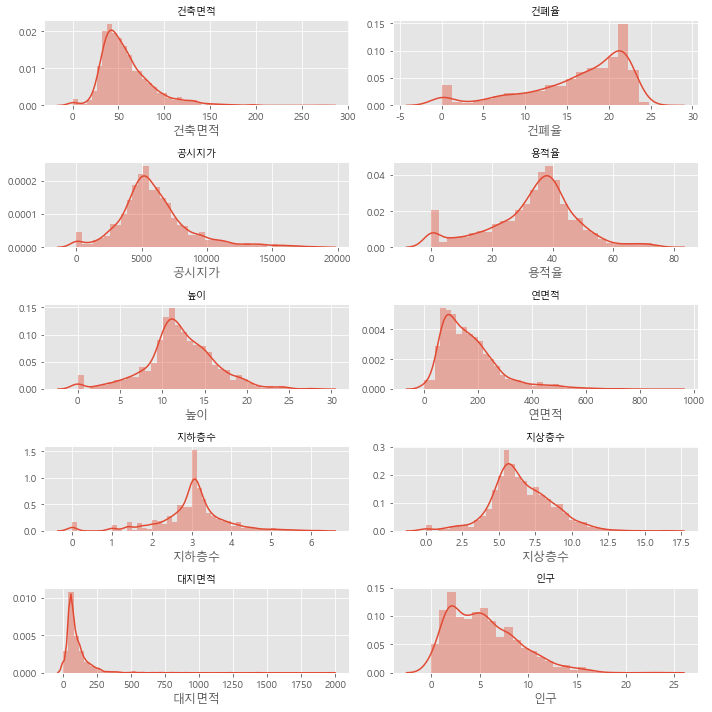

In [468]:
fig,axes=plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10,10)
a=['건축면적', '건폐율', '공시지가', '용적율', '높이', '연면적', '지하층수','지상층수', '대지면적', '인구']
    
for i in range(10):
    sns.distplot(np.sqrt(rental[a[i]]),ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title('{}'.format(a[i]),size=10)
plt.tight_layout()
plt.show()

* 루트 변환
    * 건축면적
    * 공시지가
    * 인구
    * 연면적
    * 높이
    * 용적율
    
    
* 로그 변환
    * 대지면적

In [469]:
for i in ['건축면적','공시지가','인구','연면적','높이','용적율']:
    rental[i]=np.sqrt(rental[i])
rental.loc[rental['대지면적']==0,'대지면적']=1
rental['대지면적']=np.log(rental['대지면적'])

In [470]:
rental.to_csv('C:/Users/user/Desktop/서울시청/데이터/독립변수/독립변수 스케일링.csv',encoding='cp949',index=False)

### 종속변수 병합

In [473]:
count=pd.read_csv('C:/Users/user/Desktop/서울시청/데이터/대여 데이터(종속변수)/4월대여량.csv',encoding='cp949')

In [474]:
count.head()

,대여소번호,count
0,2301,4615.0
1,2302,1653.0
2,2303,891.0
3,2304,347.0
4,2305,508.0


In [477]:
rental=rental.merge(count,on='대여소번호')

### 종속변수 이상치

* 최소한의 대여가 이루어지는 대여소 선별
* 월 150회 이상의 대여소 선별

In [478]:
rental=rental[rental['count']>150]

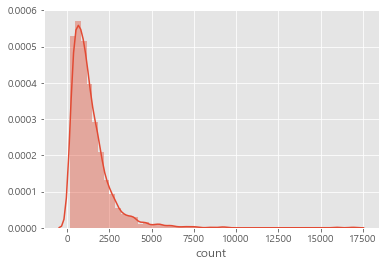

In [480]:
sns.distplot(rental['count'])

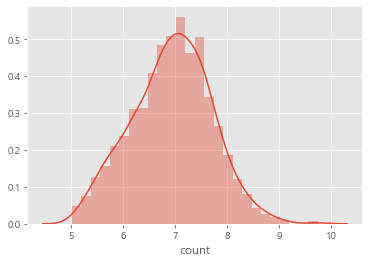

In [481]:
sns.distplot(np.log(rental['count']))

* 종속변수(4월 대여량) 로그변환

In [482]:
rental['count']=np.log(rental['count'])

In [485]:
rental.to_csv('C:/Users/user/Desktop/서울시청/데이터/독립변수/최종독립변수(변환후).csv',encoding='cp949',index=False)